In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [227]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
print(data.isnull().sum())
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [228]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [229]:
data.dropna(inplace=True, axis=1)
data
print(data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [230]:
enc = OneHotEncoder(sparse_output=False)
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))
data = pd.concat([data, pclass_enc_df], axis=1)

In [231]:
sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))
data = pd.concat([data, sex_enc_df], axis=1)

In [232]:
embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))
data = pd.concat([data, embarked_enc_df], axis=1)

In [233]:
data.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

In [234]:
xdata = data.drop('Survived', axis=1)
ydata = data['Survived']

In [235]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [236]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [237]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [238]:
ypred=clf.predict(xtest)

In [239]:
print(f"Akurasi Decision Tree: ", metrics.accuracy_score(ytest, ypred)*100, "%")

Akurasi Decision Tree:  78.35820895522389 %


Decision Tree Accuracy: 78.358209%


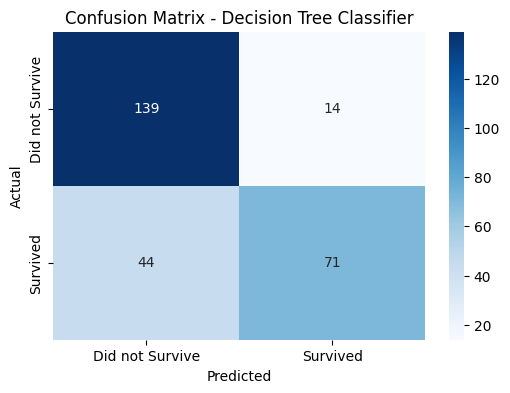

In [240]:
accuracy = metrics.accuracy_score(ytest, ypred) * 100
print(f"Decision Tree Accuracy: {accuracy:.6f}%")

conf_matrix = confusion_matrix(ytest, ypred, labels=[0, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


**Stochastic Gradient Descent**

In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Eps2-Data-train.csv')

data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [242]:
enc = OneHotEncoder(sparse_output=False)
sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

In [243]:
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))

In [244]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))
data = pd.concat([data, sex_enc_df, embarked_enc_df, pclass_enc_df], axis=1)

Stochastic Gradient Descent: 78.358209%


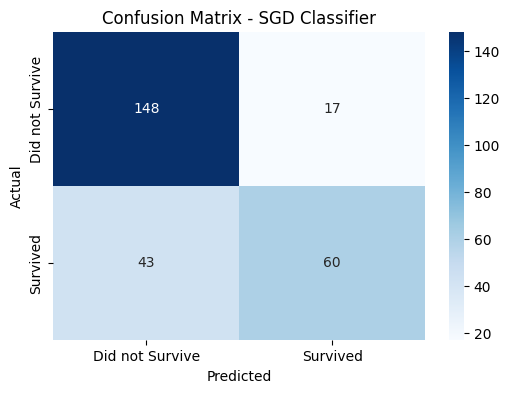

In [245]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=42, stratify=ydata)

clf_sgd = SGDClassifier(random_state=1)
clf_sgd.fit(xtrain, ytrain)

ypred_sgd = clf_sgd.predict(xtest)

accuracy_sgd = metrics.accuracy_score(ytest, ypred_sgd) * 100
print(f"Stochastic Gradient Descent: {accuracy:.6f}%")
conf_matrix = metrics.confusion_matrix(ytest, ypred_sgd)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SGD Classifier')
plt.show()

**K-Nearest Neighbors**

In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

data = pd.read_csv('/content/Eps2-Data-train.csv')

data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [247]:
enc = OneHotEncoder(sparse_output=False)

sex_enc = enc.fit_transform(data[['Sex']])
sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

In [248]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

embarked_enc = enc.fit_transform(data[['Embarked']])
embarked_enc_df = pd.DataFrame(embarked_enc, columns=enc.get_feature_names_out(['Embarked']))

In [249]:
pclass_enc = enc.fit_transform(data[['Pclass']])
pclass_enc_df = pd.DataFrame(pclass_enc, columns=enc.get_feature_names_out(['Pclass']))
data = pd.concat([data, sex_enc_df, embarked_enc_df, pclass_enc_df], axis=1)

In [250]:
data.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

xdata = data.drop('Survived', axis=1)
ydata = data['Survived']

Akurasi K-Nearest Neighbors: 70.522388%


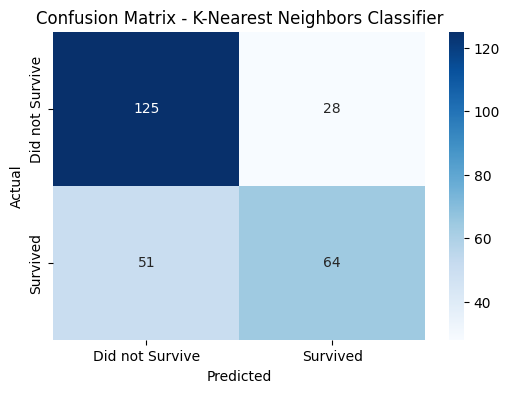

In [251]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

ypred_knn = knn.predict(xtest)

accuracy_knn = metrics.accuracy_score(ytest, ypred_knn) * 100
print(f"Akurasi K-Nearest Neighbors: {accuracy_knn:.6f}%")

conf_matrix_knn = confusion_matrix(ytest, ypred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()